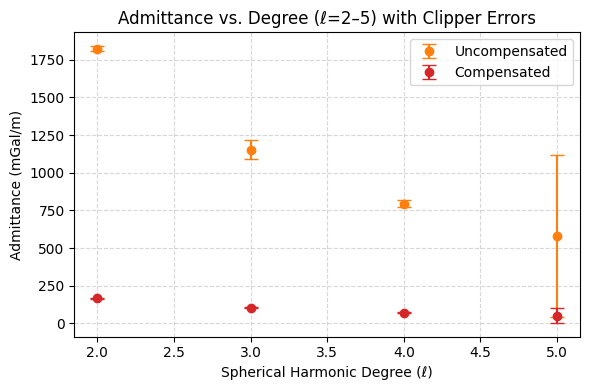

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Physical & observational parameters
G = 6.674e-11         # gravitational constant, m^3/kg/s^2
rho_diff = 100.0      # density contrast ice–ocean, kg/m^3
R0 = 1560e3           # Europa radius, m
alt = 200e3           # Clipper altitude above surface, m
r_obs = R0 + alt      # observation radius, m

# 2. Degrees to plot (ℓ = 2–5)
degrees = np.arange(2, 6, dtype=float)

# 3. Synthetic topography (Kaula law: amplitude l^-1)
topo_amp = 500.0      # peak topography amplitude, m
t_l = topo_amp * (degrees ** -1)

# 4. Admittance‐based gravity anomaly computation (mGal)
prefac   = 4 * np.pi * G * rho_diff * R0
g_uncomp = (R0 / r_obs) ** (degrees + 1) * (prefac / (2 * degrees + 1)) * t_l * 1e5

# 5. Airy‐root compensation factor (drho/rho_ocean)
c_l      = rho_diff / (rho_diff + 1000.0)  # ≈0.1
g_comp   = g_uncomp * c_l

# 6. Fractional uncertainties from Verma & Margot (2018)
#    l=2..5: use sig/|C| values; degrees above 5 omitted
uncertainties = {
    2: 4.1e-6 / 4.355e-4,
    3: 7.0e-6 / 1.31e-4,
    4: 6.6e-7 / 2.57e-5,
    5: 6.8e-7 / 7.30e-7
}
frac_unc = np.array([uncertainties[l] for l in degrees])

# 7. Admittance and its 1 sig error bars
Z_uncomp    = g_uncomp / t_l
Z_comp      = g_comp   / t_l
sigma_un    = frac_unc * Z_uncomp
sigma_comp  = frac_unc * Z_comp

# 8. Plotting
plt.figure(figsize=(6, 4))
plt.errorbar(degrees, Z_uncomp, yerr=sigma_un, fmt='o', color='tab:orange',
             capsize=5, label='Uncompensated')
plt.errorbar(degrees, Z_comp,   yerr=sigma_comp, fmt='o', color='tab:red',
             capsize=5, label='Compensated')

plt.xlabel('Spherical Harmonic Degree (l)')
plt.ylabel('Admittance (mGal/m)')
plt.title('Admittance vs. Degree (l=2–5) with Clipper Errors')
plt.legend()
plt.grid(ls='--', alpha=0.5)
plt.tight_layout()
plt.show()